In [1]:
%load_ext autoreload
%autoreload 2
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

from skimage.io import imread, imsave
import os 
import numpy as np

In [2]:
# root = "Data/Aerial/"

In [3]:
class DatasetSegmentation(torch.utils.data.Dataset):
    def __init__(self, image_path, label_path):
#         super(DataLoaderSegmentation, self).__init__()
        self.imgfolder = image_path
        self.maskfolder = label_path
        self.imgs = list(sorted(os.listdir(image_path)))
        self.masks = list(sorted(os.listdir(label_path)))

    def __getitem__(self, idx):
        img_path = os.path.join(self.imgfolder, self.imgs[idx])
        mask_path = os.path.join(self.maskfolder, self.masks[idx])
        data = imread(img_path)
        data = np.moveaxis(data, -1, 0)
        label = imread(mask_path)
        label = label/255
        return torch.from_numpy(data).float(), torch.from_numpy(label).long()

    def __len__(self):
        return len(self.imgs)

In [4]:
AerialDataset = DatasetSegmentation("../data/Aerial/RGBRandom", "../data/Aerial/GTRandom")

In [5]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(AerialDataset, batch_size=16, shuffle=False)
test_dataloader = DataLoader(AerialDataset, batch_size=16, shuffle=False)

In [6]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([16, 3, 250, 250])
Labels batch shape: torch.Size([16, 250, 250])


Feature batch shape: ((3, 250, 250), 211.0, 22.0)
Labels batch shape: ((250, 250), 1, 0)


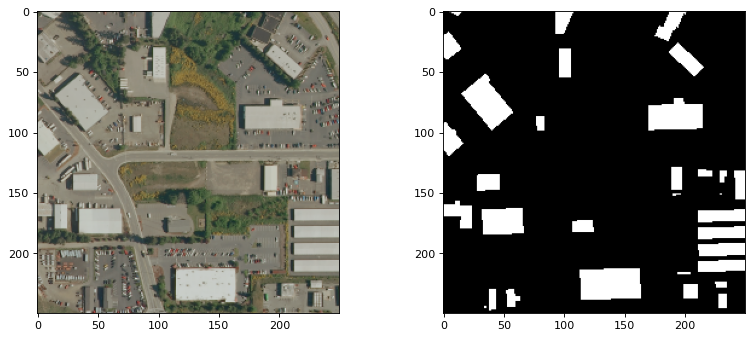

In [7]:
import random
idx = random.randint(0, 15)

img = train_features[idx].squeeze().numpy()
label = train_labels[idx].squeeze().numpy()

print(f"Feature batch shape: {img.shape, img.max(), img.min()}")
print(f"Labels batch shape: {label.shape, label.max(), label.min()}")


img = np.moveaxis(img, 0, -1)

from matplotlib.pyplot import figure

figure(figsize=(12, 5), dpi=80)
plt.subplot(1,2,1)
plt.imshow(img.astype(np.uint8) )
plt.subplot(1,2,2)

plt.imshow(label.astype(np.uint8), cmap="gray")
plt.show()


In [8]:
import torchvision
grid_img = torchvision.utils.make_grid(train_features/255, nrow=4)

grid_label = torchvision.utils.make_grid(train_labels.unsqueeze_(1), nrow=4)

In [9]:
grid_img.shape, grid_label.shape

(torch.Size([3, 1010, 1010]), torch.Size([3, 1010, 1010]))

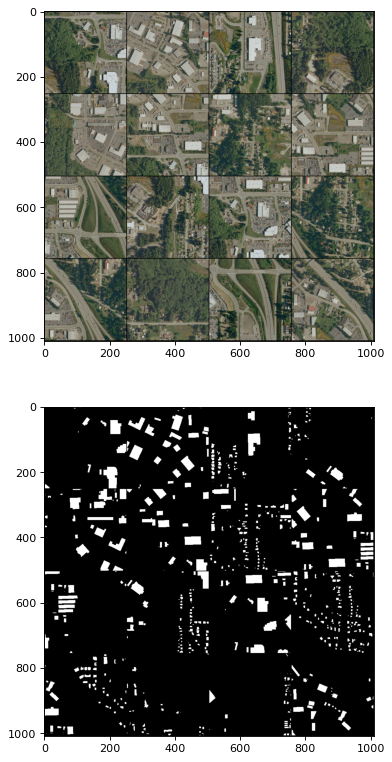

In [10]:
figure(figsize=(18, 12), dpi=80)
plt.subplot(2,1,1)
plt.imshow(grid_img.permute(1, 2, 0))
plt.subplot(2,1,2)
plt.imshow(grid_label[0,:,:], cmap='gray')